# Day 6 Network

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from matplotlib import font_manager

In [10]:
def get_cycleways_place(city_name): 
    
    # Configuring osmnx
    useful_tags = ox.settings.useful_tags_way + ['cycleway']
    ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
    
    # Querying for roads and bike trails
    cycleways = ox.graph_from_place(city_name, network_type='bike', simplify=True)
    
    # Finding all non-cycleways in the network
    non_cycleways = [(u, v, k) for  u, v, k, d  in  cycleways.edges(keys=True, data=True) if  not ('cycleway'  in  d  or  d['highway']=='cycleway')]
   
    # Remove non-cycleways and isolated nodes
    cycleways.remove_edges_from(non_cycleways)
    cycleways = ox.utils_graph.remove_isolated_nodes(cycleways)
    
    return cycleways

In [ ]:
#get data for each of the 10 cities
amsterdam = get_cycleways_place("Amsterdam")
rotterdam = get_cycleways_place("Rotterdam")
utrecht = get_cycleways_place("Utrecht")
hague = get_cycleways_place("The Hague")
#antwerp = get_cycleways_place("Antwerp")

In [43]:
hague = get_cycleways_place("The Hague")

C:\Users\lisa.hornung\anaconda3\envs\py3_ox\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [44]:
hague_stats = ox.basic_stats(hague)
hague_stats["edge_length_total"]

494191.39100000093

In [40]:
amsterdam_stats = ox.basic_stats(amsterdam)
amsterdam_stats["edge_length_total"]

1114873.7490000075

In [41]:
rotterdam_stats = ox.basic_stats(rotterdam)
rotterdam_stats["edge_length_total"]

867480.8230000003

In [37]:
utrecht_stats = ox.basic_stats(utrecht)
utrecht_stats["edge_length_total"]

502190.1229999999

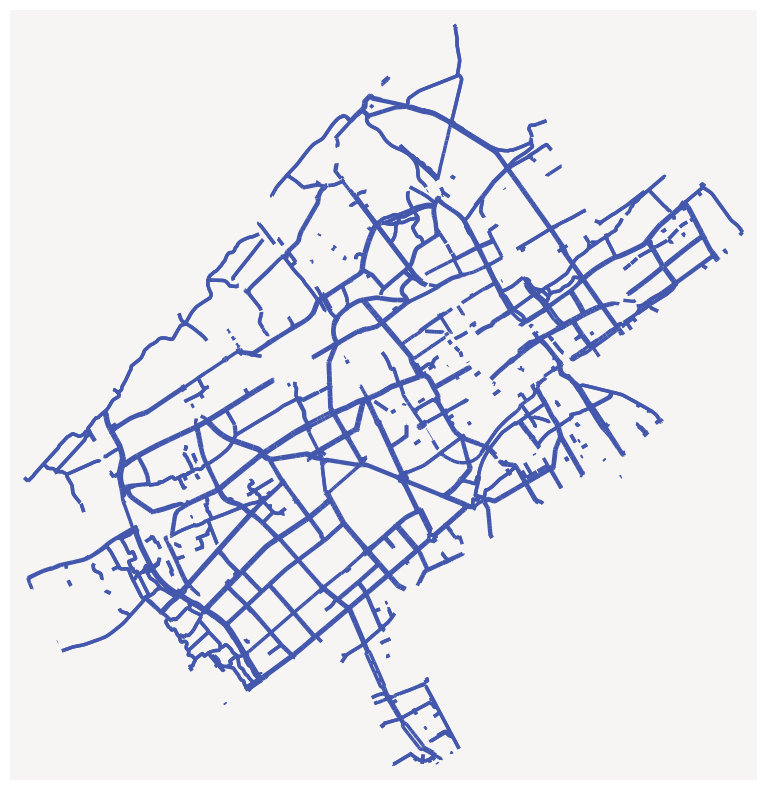

In [45]:
#Plot 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor("#F6F5F3")

ox.plot_graph(hague, ax=ax, node_size=0, edge_color="#4357AD", edge_linewidth=2.5, 
              show=False, close=False)
plt.show()